In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os,sys
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#read in the general csv too
#df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbonds/delta_scores.csv")

In [4]:
#read in the general csv too
df_general  = pd.read_csv("/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/antagonist_real_delta_scores.csv")

In [5]:
#get rid of weird 0 ddg values
df_general = df_general[df_general['ddg_compare'] != 0]

In [6]:
len(df_general)

14853928

In [7]:
#df_general.plot(kind='scatter',x='ddg_initial',y='ddg_compare')
#plt.show()

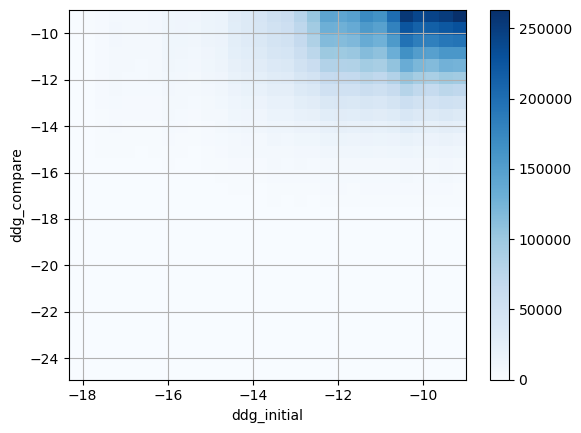

In [8]:
#Create heatmap of rmsds per system (n=85) between AutoDock and Rosetta Motifs
#Expanding x and y max to 10
#Using Blues color scale to allow for zeros to be white

x = df_general['ddg_initial']
y = df_general['ddg_compare']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=(30, 30))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.xlabel('ddg_initial')
plt.ylabel('ddg_compare')

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='Blues', aspect='auto')

plt.colorbar()

plt.grid(True)
plt.show()

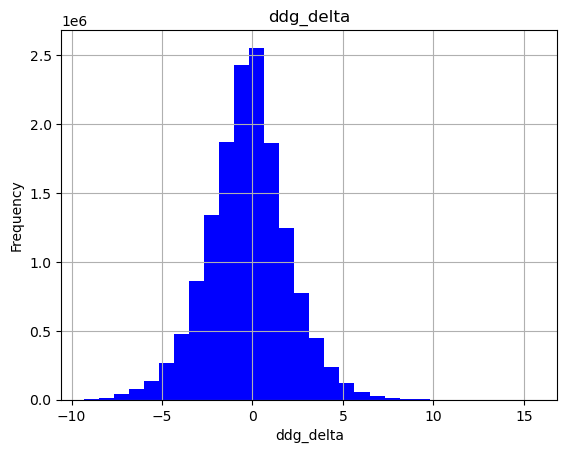

In [9]:
#plot the delta ddg in histogram
x = df_general['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

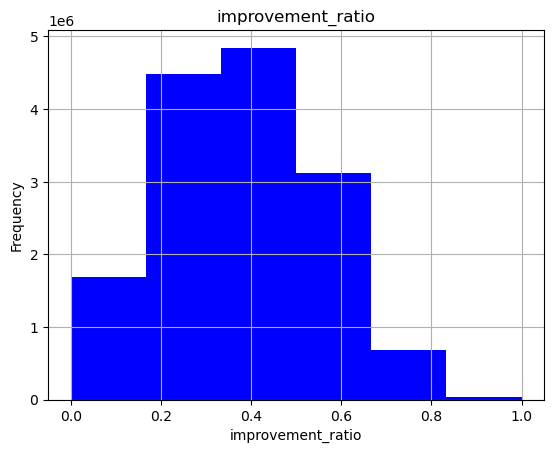

In [10]:
#plot the delta ddg in histogram
x = df_general['improvement_ratio']
#set labels and title
plt.xlabel('improvement_ratio')
plt.ylabel('Frequency')
plt.title('improvement_ratio')
#create 30 bin 1D hsitogram
plt.hist(x, bins=6, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [11]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered = df_general[(df_general['hbond_motif_count_compare'] >= 3) & (df_general['rmsd'] <= 6) & (df_general['real_motif_ratio_compare'] >= 0.5) & (df_general['ddg_delta'] > -100) & (df_general['ddg_compare'] <= -7)]

In [12]:
df_general_filtered

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
12085,/scratch/abgvg9/discovery_results/antagonists/8031/placements/4s0v_receptor_only_PV-000240115658_4_8.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000240115658/placements/4s0v_receptor_only_PV-000240115658_55_3.pdb,-10.349388,-14.096279,3.746891,6.0,8.0,-2.0,3.0,2.0,1.0,0.500000,0.500000,0.000000,1,3,-2.0,-1.122111,-2.139349,1.017238,100,100,0.0,0,0,0.0,0,0,0.0,99.028501,97.264372,1.764129,1.852172,0.6,NaN
27406,/scratch/abgvg9/discovery_results/antagonists/11998/placements/4s0v_receptor_only_PV-000280706738_3_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000280706738/placements/4s0v_receptor_only_PV-000280706738_174_20.pdb,-11.349464,-9.925352,-1.424112,6.0,8.0,-2.0,3.0,2.0,1.0,0.500000,0.500000,0.000000,0,3,-3.0,0.000000,-0.628988,0.628988,100,100,0.0,0,0,0.0,0,0,0.0,98.150536,102.945660,-4.795124,5.995781,0.4,NaN
30837,/scratch/abgvg9/discovery_results/antagonists/11520/placements/4s0v_receptor_only_PV-000280772125_9_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000280772125/placements/4s0v_receptor_only_PV-000280772125_8_9.pdb,-12.883040,-11.076728,-1.806312,6.0,7.0,-1.0,4.0,2.0,2.0,0.666667,0.571429,0.095238,0,3,-3.0,0.000000,-1.111605,1.111605,100,100,0.0,0,0,0.0,0,0,0.0,97.783627,100.383096,-2.599469,5.810469,0.4,NaN
41740,/scratch/abgvg9/discovery_results/antagonists/9586/placements/4s0v_receptor_only_PV-000353015272_3_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000353015272/placements/4s0v_receptor_only_PV-000353015272_123_0.pdb,-13.285595,-13.120424,-0.165171,6.0,8.0,-2.0,2.0,2.0,0.0,0.500000,0.500000,0.000000,1,3,-2.0,-0.499613,-1.120760,0.621147,100,100,0.0,0,0,0.0,0,0,0.0,95.714792,99.258816,-3.544024,5.749639,0.4,NaN
43839,/scratch/abgvg9/discovery_results/antagonists/4537/placements/4s0v_receptor_only_PV-000404555442_1_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000404555442/placements/4s0v_receptor_only_PV-000404555442_6_1.pdb,-10.884904,-13.656985,2.772081,6.0,6.0,0.0,4.0,4.0,0.0,0.500000,0.500000,0.000000,1,3,-2.0,-0.714966,-2.341265,1.626299,100,100,0.0,0,0,0.0,0,0,0.0,99.900130,97.501750,2.398380,0.730976,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14858895,/scratch/abgvg9/discovery_results/antagonists/2691/placements/4s0v_receptor_only_Z998214904_12_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/Z998214904/placements/4s0v_receptor_only_Z998214904_157_16.pdb,-12.460648,-14.618061,2.157413,8.0,10.0,-2.0,2.0,5.0,-3.0,0.500000,0.600000,-0.100000,0,3,-3.0,0.000000,-1.231815,1.231815,100,100,0.0,0,0,0.0,0,0,0.0,98.039352,102.750124,-4.710772,5.308642,1.0,NaN
14859682,/scratch/abgvg9/discovery_results/antagonists/2691/placements/4s0v_receptor_only_Z998214904_12_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real

In [13]:
len(df_general_filtered)

17796

In [14]:
#filter down the general dataframe to only include placements where they meet the following criteria:
#rmsd < 6
#ddg_delta is positive
#real motif ratio is >= 0.5
#at least 3 rosetta hbonds
#ddg < -15
#
#
#

df_general_filtered_lite = df_general[(df_general['real_motif_ratio_compare'] >= 0.5)]

In [15]:
df_general_filtered_lite

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
29,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_47_12.pdb,-11.661791,-9.245399,-2.416392,6.0,6.0,0.0,3.0,3.0,0.0,0.5,0.500000,0.000000,0,0,0.0,0.0,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,100.254601,-2.416392,5.929680,0.0,NaN
72,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_190_4.pdb,-11.661791,-13.308651,1.646860,6.0,6.0,0.0,3.0,2.0,1.0,0.5,0.500000,0.000000,0,0,0.0,0.0,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,95.191349,2.646860,3.480988,0.2,NaN
102,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_188_5.pdb,-11.661791,-10.054792,-1.606999,6.0,9.0,-3.0,3.0,2.0,1.0,0.5,0.555556,-0.055556,0,0,0.0,0.0,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,101.500764,-3.662555,5.534939,0.4,NaN
195,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_172_7.pdb,-11.661791,-10.267064,-1.394727,6.0,6.0,0.0,3.0,3.0,0.0,0.5,0.500000,0.000000,0,0,0.0,0.0,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,99.232936,-1.394727,6.415143,0.0,NaN
233,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_70_5.pdb,-11.661791,-10.858740,-0.803051,6.0,8.0,-2.0,3.0,2.0,1.0,0.5,0.500000,0.000000,0,0,0.0,0.0,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,99.641260,-1.803051,4.127981,0.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14861152,/scratch/abgvg9/discovery_results/antagonists/2691/placements/4s0v_receptor_only_Z998214904_12_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/Z998214904/placements/4s0v_receptor_only_Z998214904_151_14.pdb,-12.460648,-15.983864,3.523216,8.0,9.0,-1.0,2.0,5.0,-3.0,0.5,0.555556,-0.055556,0,2,-2.0,0.0,-1.349241,1.349241,100,100,0.0,0,0,0.0,0,0,0.0,98.039352,99.222451,-1.183099,5.531865,1.0,NaN
14861153,/scratch/abgvg9/discovery_results/antagonists/2691/placements/4s0v_receptor_only_Z998214904_12_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/Z998214904/placements/4s0v_receptor_only_Z998214904_28_27.pd

In [16]:
len(df_general_filtered_lite)

1066180

In [17]:
#get a count on the number of placements that are very close to the original placement
df_recoveries = df_general

#get rid of weird 0 ddg values
df_recoveries = df_recoveries[df_recoveries['ddg_compare'] != 0]

df_recoveries = df_recoveries[df_recoveries['rmsd'] < 1]

In [18]:
len(df_recoveries)

46988

In [19]:
#aggregate by file_initial
closest_recovery_general_df = df_general.loc[df_general.groupby('file_initial')['rmsd'].idxmin()]

In [20]:
len(closest_recovery_general_df)

7181

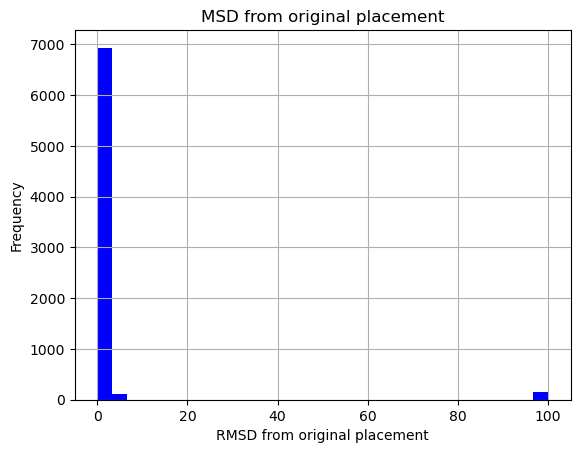

In [21]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['rmsd']
#set labels and title
plt.xlabel('RMSD from original placement')
plt.ylabel('Frequency')
plt.title('MSD from original placement')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [22]:
systems_with_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_with_a_close_recovery_df = systems_with_a_close_recovery_df[systems_with_a_close_recovery_df['rmsd'] < 4]
len(systems_with_a_close_recovery_df)

7017

In [23]:
len(systems_with_a_close_recovery_df)/len(closest_recovery_general_df)

0.9771619551594486

In [24]:
systems_with_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
12300671,/scratch/abgvg9/discovery_results/antagonists/100/placements/4s0v_receptor_only_Z2962175915_13_4.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/Z2962175915/placements/4s0v_receptor_only_Z2962175915_185_6.pdb,-11.017790,-11.708960,0.691170,6.0,7.0,-1.0,1.0,2.0,-1.0,0.5,0.428571,0.071429,2,2,0.0,-1.262719,-1.633907,0.371188,100,100,0.0,0,0,0.0,0,0,0.0,97.219491,98.085704,-0.866213,0.259997,0.6,NaN
14488539,/scratch/abgvg9/discovery_results/antagonists/100/placements/4s0v_receptor_only_Z4620877260_2_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/Z4620877260/placements/4s0v_receptor_only_Z4620877260_163_2.pdb,-10.348075,-9.412894,-0.935181,6.0,6.0,0.0,5.0,5.0,0.0,0.5,0.333333,0.166667,1,1,0.0,-0.731025,-0.773990,0.042965,100,100,0.0,0,0,0.0,0,0,0.0,101.420900,102.146449,-0.725549,0.343680,0.0,NaN
5936679,/scratch/abgvg9/discovery_results/antagonists/10003/placements/4s0v_receptor_only_PV-005596531283_4_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-005596531283/placements/4s0v_receptor_only_PV-005596531283_79_4.pdb,-10.229421,-10.642287,0.412866,6.0,6.0,0.0,1.0,1.0,0.0,0.5,0.333333,0.166667,2,2,0.0,-1.527786,-1.829741,0.301955,100,100,0.0,0,0,0.0,0,0,0.0,97.742793,96.861305,0.881488,0.575659,0.2,NaN
58064,/scratch/abgvg9/discovery_results/antagonists/10005/placements/4s0v_receptor_only_PV-000406285601_7_2.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000406285601/placements/4s0v_receptor_only_PV-000406285601_2_2.pdb,-11.657106,-11.379492,-0.277614,6.0,6.0,0.0,3.0,3.0,0.0,0.5,0.500000,0.000000,1,1,0.0,-0.535301,-0.297642,-0.237659,100,100,0.0,0,0,0.0,0,0,0.0,98.307593,98.822866,-0.515273,0.655476,0.0,NaN
5941825,/scratch/abgvg9/discovery_results/antagonists/10006/placements/4s0v_receptor_only_PV-005598694708_14_8.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-005598694708/placements/4s0v_receptor_only_PV-005598694708_53_17.pdb,-13.939636,-11.764646,-2.174990,6.0,6.0,0.0,1.0,1.0,0.0,0.5,0.500000,0.000000,2,2,0.0,-1.370078,-0.952944,-0.417134,100,100,0.0,0,0,0.0,0,0,0.0,94.190286,96.782410,-2.592124,0.358139,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905627,/scratch/abgvg9/discovery_results/antagonists/9981/placements/4s0v_receptor_only_PV-005578352332_4_4.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-005578352332/placements/4s0v_receptor_only_PV-005578352332_44_5.pdb,-12.946247,-12.722348,-0.223899,6.0,7.0,-1.0,2.0,3.0,-1.0,0.5,0.285714,0.214286,1,1,0.0,-2.151796,-1.789643,-0.362153,100,100,0.0,0,0,0.0,0,0,0.0,94.401957,96.773723,-2.371766,0.616388,0.4,NaN
5914001,/scratch/abgvg9/discovery_results/antagonists/9988/placements/4s0v_receptor_only_PV-005583717120_10_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-00

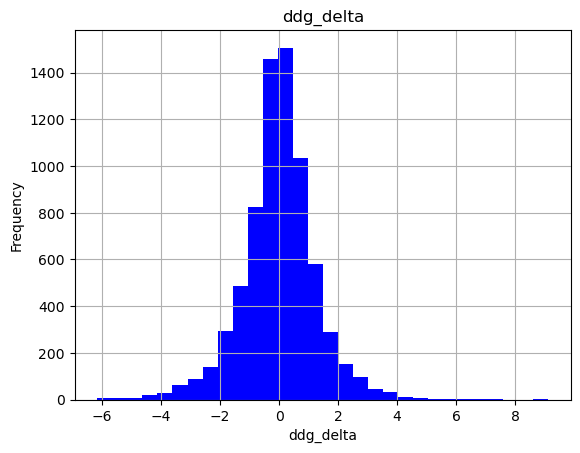

In [25]:
#plot the delta ddg in histogram
x = closest_recovery_general_df['ddg_delta']
#set labels and title
plt.xlabel('ddg_delta')
plt.ylabel('Frequency')
plt.title('ddg_delta')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [26]:
#grab the systems that did not recover and take a look
systems_without_a_close_recovery_df = closest_recovery_general_df[closest_recovery_general_df['ddg_compare'] != 0]
systems_without_a_close_recovery_df = systems_without_a_close_recovery_df[systems_without_a_close_recovery_df['rmsd'] > 4]
len(systems_without_a_close_recovery_df)

164

In [27]:
len(systems_without_a_close_recovery_df)/len(closest_recovery_general_df)

0.022838044840551457

In [28]:
systems_without_a_close_recovery_df

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
6103362,/scratch/abgvg9/discovery_results/antagonists/10088/placements/4s0v_receptor_only_PV-005665907679_1_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-005665907679/placements/4s0v_receptor_only_PV-005665907679_21_21.pdb,-12.814633,-12.150092,-0.664541,8.0,6.0,2.0,3.0,2.0,1.0,0.5,0.666667,-0.166667,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,98.685367,96.516575,2.168792,100.000000,0.2,NaN
6135722,/scratch/abgvg9/discovery_results/antagonists/10099/placements/4s0v_receptor_only_PV-005674989920_13_4.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-005674989920/placements/4s0v_receptor_only_PV-005674989920_116_0.pdb,-10.158667,-9.138405,-1.020262,6.0,6.0,0.0,2.0,3.0,-1.0,0.5,0.166667,0.333333,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,98.341333,100.028262,-1.686929,100.000000,0.2,NaN
615664,/scratch/abgvg9/discovery_results/antagonists/10273/placements/4s0v_receptor_only_PV-001746719452_11_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-001746719452/placements/4s0v_receptor_only_PV-001746719452_36_5.pdb,-10.221602,-11.205485,0.983883,6.0,9.0,-3.0,1.0,2.0,-1.0,0.5,0.111111,0.388889,0,0,0.0,0.000000,0.000000,0.000000,100,100,0.0,0,0,0.0,0,0,0.0,97.278398,99.905626,-2.627228,100.000000,0.6,NaN
6576343,/scratch/abgvg9/discovery_results/antagonists/10353/placements/4s0v_receptor_only_PV-005886389763_6_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-005886389763/placements/4s0v_receptor_only_PV-005886389763_7_4.pdb,-11.409019,-9.020531,-2.388488,6.0,10.0,-4.0,2.0,3.0,-1.0,0.5,0.200000,0.300000,1,1,0.0,-0.715719,-0.074296,-0.641423,100,100,0.0,0,0,0.0,0,0,0.0,97.375262,105.105173,-7.729911,100.000000,0.4,NaN
6727035,/scratch/abgvg9/discovery_results/antagonists/10448/placements/4s0v_receptor_only_PV-005966550767_14_11.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-005966550767/placements/4s0v_receptor_only_PV-005966550767_20_19.pdb,-11.621000,-9.685719,-1.935281,6.0,9.0,-3.0,3.0,2.0,1.0,0.5,0.333333,0.166667,1,1,0.0,-0.185517,-0.431024,0.245507,100,100,0.0,0,0,0.0,0,0,0.0,98.693483,102.216590,-3.523107,100.000000,0.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941091,/scratch/abgvg9/discovery_results/antagonists/9424/placements/4s0v_receptor_only_PV-005114454320_11_2.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-005114454320/placements/4s0v_receptor_only_PV-005114454320_107_2.pdb,-16.270815,-10.211525,-6.059290,6.0,7.0,-1.0,4.0,4.0,0.0,0.5,0.142857,0.357143,3,1,2.0,-2.526546,-1.274083,-1.252463,100,100,0.0,0,0,0.0,0,0,0.0,94.702639,100.657249,-5.954610,100.000000,0.2,NaN
5008729,/scratch/abgvg9/discovery_results/antagonists/9469/placements/4s0v_receptor_only_PV-005151668380_4_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_l

In [29]:
#get close rmsd placements with overall improvements
df_general_complete_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 1)]
len(df_general_complete_improvements)
df_general_complete_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
1071,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_24_2.pdb,-11.661791,-12.854894,1.193103,6.0,8.0,-2.0,3.0,4.0,-1.0,0.5,0.625000,-0.125000,0,1,-1.0,0.0,-0.758071,0.758071,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,100.012035,-2.173826,5.541521,1.0,NaN
2610,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_24_2.pdb,-11.661791,-12.854894,1.193103,6.0,8.0,-2.0,3.0,4.0,-1.0,0.5,0.625000,-0.125000,0,1,-1.0,0.0,-0.758071,0.758071,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,100.012035,-2.173826,5.541521,1.0,NaN
18889,/scratch/abgvg9/discovery_results/antagonists/11743/placements/4s0v_receptor_only_PV-000280378095_9_7.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000280378095/placements/4s0v_receptor_only_PV-000280378095_238_27.pdb,-13.359948,-15.172642,1.812694,6.0,9.0,-3.0,4.0,5.0,-1.0,0.5,0.555556,-0.055556,0,1,-1.0,0.0,-0.878354,0.878354,100,100,0.0,0,0,0.0,0,0,0.0,97.140052,99.504560,-2.364508,3.707919,1.0,NaN
19348,/scratch/abgvg9/discovery_results/antagonists/11743/placements/4s0v_receptor_only_PV-000280378095_9_7.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000280378095/placements/4s0v_receptor_only_PV-000280378095_238_27.pdb,-13.359948,-15.172642,1.812694,6.0,9.0,-3.0,4.0,5.0,-1.0,0.5,0.555556,-0.055556,0,1,-1.0,0.0,-0.878354,0.878354,100,100,0.0,0,0,0.0,0,0,0.0,97.140052,99.504560,-2.364508,3.707919,1.0,NaN
21093,/scratch/abgvg9/discovery_results/antagonists/11465/placements/4s0v_receptor_only_PV-000280379884_8_2.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000280379884/placements/4s0v_receptor_only_PV-000280379884_77_33.pdb,-11.625699,-11.981333,0.355634,6.0,7.0,-1.0,2.0,5.0,-3.0,0.5,0.571429,-0.071429,0,1,-1.0,0.0,-0.213616,0.213616,100,100,0.0,0,0,0.0,0,0,0.0,96.874301,101.376480,-4.502179,3.966341,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14861152,/scratch/abgvg9/discovery_results/antagonists/2691/placements/4s0v_receptor_only_Z998214904_12_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/Z998214904/placements/4s0v_receptor_only_Z998214904_151_14.pdb,-12.460648,-15.983864,3.523216,8.0,9.0,-1.0,2.0,5.0,-3.0,0.5,0.555556,-0.055556,0,2,-2.0,0.0,-1.349241,1.349241,100,100,0.0,0,0,0.0,0,0,0.0,98.039352,99.222451,-1.183099,5.531865,1.0,NaN
14861153,/scratch/abgvg9/discovery_results/antagonists/2691/placements/4s0v_receptor_only_Z998214904_12_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/Z998214904/placements/4s0

In [30]:
#get close rmsd placements with overall improvements
df_general_0_8_improvements = df_general[(df_general['rmsd'] <= 6) & (df_general['improvement_ratio'] >= 0.8)]
len(df_general_0_8_improvements)
df_general_0_8_improvements

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
1,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_120_1.pdb,-11.661791,-13.812205,2.150414,6.0,9.0,-3.0,3.0,4.0,-1.0,0.5,0.333333,0.166667,0,2,-2.0,0.0,-1.092438,1.092438,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,100.428690,-2.590481,4.394661,0.8,NaN
6,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_123_8.pdb,-11.661791,-12.251190,0.589399,6.0,11.0,-5.0,3.0,5.0,-2.0,0.5,0.181818,0.318182,0,1,-1.0,0.0,-0.951291,0.951291,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,103.979337,-6.141128,5.414333,0.8,NaN
30,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_165_15.pdb,-11.661791,-12.656851,0.995060,6.0,9.0,-3.0,3.0,4.0,-1.0,0.5,0.222222,0.277778,0,1,-1.0,0.0,-0.695533,0.695533,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,100.869838,-3.031629,5.047178,0.8,NaN
48,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_23_5.pdb,-11.661791,-12.482067,0.820276,6.0,8.0,-2.0,3.0,4.0,-1.0,0.5,0.375000,0.125000,0,1,-1.0,0.0,-0.610730,0.610730,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,100.282203,-2.443994,5.577605,0.8,NaN
106,/scratch/abgvg9/discovery_results/antagonists/7424/placements/4s0v_receptor_only_PV-000233272128_1_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000233272128/placements/4s0v_receptor_only_PV-000233272128_115_3.pdb,-11.661791,-12.413849,0.752058,6.0,8.0,-2.0,3.0,5.0,-2.0,0.5,0.125000,0.375000,0,1,-1.0,0.0,-0.093925,0.093925,100,100,0.0,0,0,0.0,0,0,0.0,97.838209,101.617226,-3.779017,4.278147,0.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14861152,/scratch/abgvg9/discovery_results/antagonists/2691/placements/4s0v_receptor_only_Z998214904_12_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/Z998214904/placements/4s0v_receptor_only_Z998214904_151_14.pdb,-12.460648,-15.983864,3.523216,8.0,9.0,-1.0,2.0,5.0,-3.0,0.5,0.555556,-0.055556,0,2,-2.0,0.0,-1.349241,1.349241,100,100,0.0,0,0,0.0,0,0,0.0,98.039352,99.222451,-1.183099,5.531865,1.0,NaN
14861153,/scratch/abgvg9/discovery_results/antagonists/2691/placements/4s0v_receptor_only_Z998214904_12_6.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/Z998214904/placements/4s0v_receptor_only_Z99

In [31]:
#get close rmsd placements with overall improvements
df_general_high_hbonds = df_general[(df_general['rmsd'] <= 4) & (df_general['hbond_motif_count_delta'] <= -1) & (df_general['hbond_motif_count_compare'] >= 3) & (df_general['ddg_delta'] >= 0) & (df_general['ddg_compare'] <= -18) & (df_general['real_motif_ratio_compare'] >= 0.25)]
len(df_general_high_hbonds)


138

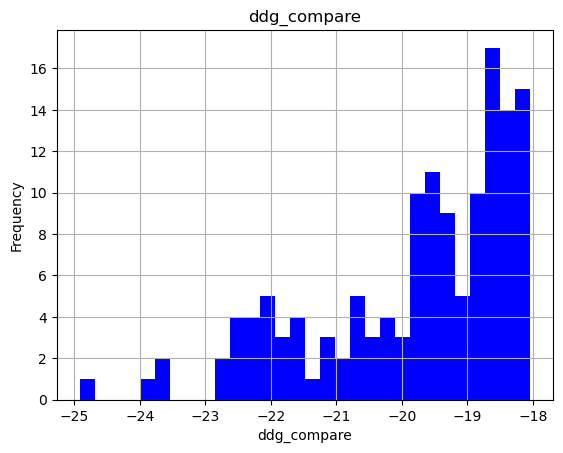

In [32]:
#plot the delta ddg in histogram
x = df_general_high_hbonds['ddg_compare']
#set labels and title
plt.xlabel('ddg_compare')
plt.ylabel('Frequency')
plt.title('ddg_compare')
#create 30 bin 1D hsitogram
plt.hist(x, bins=30, color='blue')
#set grid
plt.grid(True)
#show plot
plt.show()

In [33]:
df_general_high_hbonds

,file_initial,file_compare,ddg_initial,ddg_compare,ddg_delta,total_motifs_initial,total_motifs_compare,total_motifs_delta,significant_motifs_initial,significant_motifs_compare,significant_motifs_delta,real_motif_ratio_initial,real_motif_ratio_compare,real_motif_ratio_delta,hbond_motif_count_initial,hbond_motif_count_compare,hbond_motif_count_delta,hbond_motif_energy_sum_initial,hbond_motif_energy_sum_compare,hbond_motif_energy_sum_delta,closest_autodock_recovery_rmsd_initial,closest_autodock_recovery_rmsd_compare,closest_autodock_recovery_rmsd_delta,closest_autodock_recovery_ddg_initial,closest_autodock_recovery_ddg_compare,closest_autodock_recovery_ddg_delta,strain_energy_initial,strain_energy_compare,strain_energy_delta,total_initial,total_compare,total_delta,rmsd,improvement_ratio,Unnamed: 34
315175,/scratch/abgvg9/discovery_results/antagonists/11198/placements/4s0v_receptor_only_PV-000556223235_4_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-000556223235/placements/4s0v_receptor_only_PV-000556223235_6_4.pdb,-10.683899,-20.771679,10.087780,6.0,11.0,-5.0,3.0,5.0,-2.0,0.5,0.272727,0.227273,0,3,-3.0,0.000000,-3.342864,3.342864,100,100,0.0,0,0,0.0,0,0,0.0,98.816101,95.158184,3.657917,2.844009,0.8,NaN
425004,/scratch/abgvg9/discovery_results/antagonists/912/placements/4s0v_receptor_only_PV-001132025661_6_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-001132025661/placements/4s0v_receptor_only_PV-001132025661_109_10.pdb,-9.361778,-19.365784,10.004006,6.0,10.0,-4.0,4.0,5.0,-1.0,0.5,0.300000,0.200000,2,4,-2.0,-0.652332,-2.756154,2.103822,100,100,0.0,0,0,0.0,0,0,0.0,102.485890,97.178062,5.307828,1.417300,0.8,NaN
425763,/scratch/abgvg9/discovery_results/antagonists/912/placements/4s0v_receptor_only_PV-001132025661_6_10.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-001132025661/placements/4s0v_receptor_only_PV-001132025661_109_10.pdb,-9.361778,-19.365784,10.004006,6.0,10.0,-4.0,4.0,5.0,-1.0,0.5,0.300000,0.200000,2,4,-2.0,-0.652332,-2.756154,2.103822,100,100,0.0,0,0,0.0,0,0,0.0,102.485890,97.178062,5.307828,1.417300,0.8,NaN
483963,/scratch/abgvg9/discovery_results/antagonists/3874/placements/4s0v_receptor_only_PV-001466786086_5_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-001466786086/placements/4s0v_receptor_only_PV-001466786086_101_1.pdb,-11.898437,-18.246800,6.348363,6.0,11.0,-5.0,3.0,4.0,-1.0,0.5,0.545455,-0.045455,1,3,-2.0,-0.011201,-2.105529,2.094328,100,100,0.0,0,0,0.0,0,0,0.0,98.590362,98.193126,0.397236,3.607280,1.0,NaN
485322,/scratch/abgvg9/discovery_results/antagonists/3874/placements/4s0v_receptor_only_PV-001466786086_5_0.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/PV-001466786086/placements/4s0v_receptor_only_PV-001466786086_101_1.pdb,-11.898437,-18.246800,6.348363,6.0,11.0,-5.0,3.0,4.0,-1.0,0.5,0.545455,-0.045455,1,3,-2.0,-0.011201,-2.105529,2.094328,100,100,0.0,0,0,0.0,0,0,0.0,98.590362,98.193126,0.397236,3.607280,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729043,/scratch/abgvg9/discovery_results/antagonists/1399/placements/4s0v_receptor_only_Z4078506325_5_3.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/antagonist_real/Z4078506325/placements/4s0v_receptor_only_Z4078506325_62_6.pdb,-11.995935,-18.692750,6.696815,6.0,12.0,-6.0,1.0,5.0,-4.0,0.5,0.416667,0.083333,2,3,-1.0,-0.300598,-2.179679,1.879081,100,100,0.0,0,0,0.0,0,0,0.0,97.203467,99.544238,-2.340771,3.609331,0.8,NaN
14499651,/scratch/abgvg9/discovery_results/antagonists/6602/placements/4s0v_receptor_only_Z4640829926_12_1.pdb,/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/ant

In [34]:
len(df_general_high_hbonds)

138

In [35]:
# Extract ligand names using a regular expression
df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'4s0v_receptor_only_(.+?)_\d+_\d+\.pdb')

# Find the unique ligand names and their count
unique_ligands = df_general_high_hbonds['ligand_name'].unique()
num_unique_ligands = len(unique_ligands)

# Display the unique ligand names and the count
print("Unique Ligand Names:", unique_ligands)
print("Number of Unique Ligands:", num_unique_ligands)

Unique Ligand Names: ['PV-000556223235' 'PV-001132025661' 'PV-001466786086' 'PV-002221910629'
 'PV-003521244127' 'PV-003954496899' 'PV-004266738505' 'PV-004520922151'
 'PV-004778732756' 'PV-005027556376' 'PV-005091654909' 'PV-005251466564'
 'PV-005271386320' 'PV-005322927130' 'PV-005474872824' 'PV-005508215235'
 'PV-005576664529' 'PV-005749322243' 'PV-005859624161' 'PV-006081867280'
 'PV-006285723521' 'PV-006290549526' 'PV-006512772507' 'PV-006518618011'
 'Z1141296323' 'Z133963954' 'Z1486372029' 'Z1725521663' 'Z1738787391'
 'Z193053148' 'Z2169713547' 'Z2204943049' 'Z2645282675' 'Z278630824'
 'Z2841681746' 'Z3360656891' 'Z365106768' 'Z3914924625' 'Z4078506325'
 'Z4640829926' 'Z741186566']
Number of Unique Ligands: 41


/scratch/local/ipykernel_147629/2743136754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_general_high_hbonds['ligand_name'] = df_general_high_hbonds['file_compare'].str.extract(r'4s0v_receptor_only_(.+?)_\d+_\d+\.pdb')


In [36]:
"""
for i in df_general_high_hbonds['file_initial']:
    #print(i['file_initial'], i['file_compare'])
    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")
"""

'\nfor i in df_general_high_hbonds[\'file_initial\']:\n    #print(i[\'file_initial\'], i[\'file_compare\'])\n    print("cp " + i + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements")\n'

In [ ]:
line_counter = 0
folder_counter = 0

destination = "/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real"
if destination.endswith("/") == False:
    destination = destination + "/"

for index, row in df_general_high_hbonds.iterrows():
    
    #make a string of line counter to be 5 digits long
    my_str = str(line_counter)
    while len(my_str) < 5:
        my_str = "0" + my_str
    
    os.system("mkdir " + destination + str(folder_counter))
    #print("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    
    new_init = my_str + "_initial_" + row['file_initial'].split("/")[len(row['file_initial'].split("/")) - 1]
    new_comp = my_str + "_compare_" + row['file_compare'].split("/")[len(row['file_compare'].split("/")) - 1]
    
    print(new_init, new_comp)
    
    #os.system("cp " + row['file_initial'] + " " + row['file_compare'] + " /scratch/abgvg9/discovery_results/top_1000_placement/confs_for_placements/conf_placements_for_analysis/real_and_hbond_best_improved_placements/" + str(folder_counter))
    os.system("cp " + row['file_initial'] + " " + destination + str(folder_counter) + "/" + new_init)
    os.system("cp " + row['file_compare'] + " " + destination + str(folder_counter) + "/" + new_comp)
    os.system("sleep 0.1")
    
    line_counter = line_counter + 1
    
    if line_counter % 50 == 0:
        folder_counter = folder_counter + 1
        
#write the df_general_high_hbonds to csv
df_general_high_hbonds.to_csv(destination + 'antagonist_real_and_hbond_best_improved_placements_sheet.csv', index=False)

00000_initial_4s0v_receptor_only_PV-000556223235_4_1.pdb 00000_compare_4s0v_receptor_only_PV-000556223235_6_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00001_initial_4s0v_receptor_only_PV-001132025661_6_10.pdb 00001_compare_4s0v_receptor_only_PV-001132025661_109_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00002_initial_4s0v_receptor_only_PV-001132025661_6_10.pdb 00002_compare_4s0v_receptor_only_PV-001132025661_109_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00003_initial_4s0v_receptor_only_PV-001466786086_5_0.pdb 00003_compare_4s0v_receptor_only_PV-001466786086_101_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00004_initial_4s0v_receptor_only_PV-001466786086_5_0.pdb 00004_compare_4s0v_receptor_only_PV-001466786086_101_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00005_initial_4s0v_receptor_only_PV-002221910629_1_10.pdb 00005_compare_4s0v_receptor_only_PV-002221910629_23_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00006_initial_4s0v_receptor_only_PV-002221910629_1_10.pdb 00006_compare_4s0v_receptor_only_PV-002221910629_23_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00007_initial_4s0v_receptor_only_PV-003521244127_3_5.pdb 00007_compare_4s0v_receptor_only_PV-003521244127_85_24.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00008_initial_4s0v_receptor_only_PV-003521244127_3_5.pdb 00008_compare_4s0v_receptor_only_PV-003521244127_85_24.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00009_initial_4s0v_receptor_only_PV-003954496899_4_1.pdb 00009_compare_4s0v_receptor_only_PV-003954496899_161_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00010_initial_4s0v_receptor_only_PV-004266738505_1_0.pdb 00010_compare_4s0v_receptor_only_PV-004266738505_194_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00011_initial_4s0v_receptor_only_PV-004520922151_1_2.pdb 00011_compare_4s0v_receptor_only_PV-004520922151_32_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00012_initial_4s0v_receptor_only_PV-004778732756_9_6.pdb 00012_compare_4s0v_receptor_only_PV-004778732756_127_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00013_initial_4s0v_receptor_only_PV-004778732756_9_6.pdb 00013_compare_4s0v_receptor_only_PV-004778732756_127_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00014_initial_4s0v_receptor_only_PV-005027556376_5_1.pdb 00014_compare_4s0v_receptor_only_PV-005027556376_145_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00015_initial_4s0v_receptor_only_PV-005027556376_5_1.pdb 00015_compare_4s0v_receptor_only_PV-005027556376_145_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00016_initial_4s0v_receptor_only_PV-005091654909_9_2.pdb 00016_compare_4s0v_receptor_only_PV-005091654909_98_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00017_initial_4s0v_receptor_only_PV-005251466564_9_5.pdb 00017_compare_4s0v_receptor_only_PV-005251466564_131_36.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00018_initial_4s0v_receptor_only_PV-005271386320_3_15.pdb 00018_compare_4s0v_receptor_only_PV-005271386320_238_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00019_initial_4s0v_receptor_only_PV-005322927130_7_4.pdb 00019_compare_4s0v_receptor_only_PV-005322927130_151_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00020_initial_4s0v_receptor_only_PV-005322927130_7_4.pdb 00020_compare_4s0v_receptor_only_PV-005322927130_151_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00021_initial_4s0v_receptor_only_PV-005474872824_4_5.pdb 00021_compare_4s0v_receptor_only_PV-005474872824_22_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00022_initial_4s0v_receptor_only_PV-005508215235_14_9.pdb 00022_compare_4s0v_receptor_only_PV-005508215235_51_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00023_initial_4s0v_receptor_only_PV-005508215235_14_9.pdb 00023_compare_4s0v_receptor_only_PV-005508215235_51_23.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00024_initial_4s0v_receptor_only_PV-005508215235_14_9.pdb 00024_compare_4s0v_receptor_only_PV-005508215235_56_24.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00025_initial_4s0v_receptor_only_PV-005508215235_14_9.pdb 00025_compare_4s0v_receptor_only_PV-005508215235_51_21.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00026_initial_4s0v_receptor_only_PV-005576664529_1_0.pdb 00026_compare_4s0v_receptor_only_PV-005576664529_11_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00027_initial_4s0v_receptor_only_PV-005749322243_2_12.pdb 00027_compare_4s0v_receptor_only_PV-005749322243_234_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00028_initial_4s0v_receptor_only_PV-005859624161_8_0.pdb 00028_compare_4s0v_receptor_only_PV-005859624161_191_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00029_initial_4s0v_receptor_only_PV-006081867280_14_0.pdb 00029_compare_4s0v_receptor_only_PV-006081867280_74_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00030_initial_4s0v_receptor_only_PV-006285723521_9_2.pdb 00030_compare_4s0v_receptor_only_PV-006285723521_43_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00031_initial_4s0v_receptor_only_PV-006285723521_9_2.pdb 00031_compare_4s0v_receptor_only_PV-006285723521_43_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00032_initial_4s0v_receptor_only_PV-006285723521_9_2.pdb 00032_compare_4s0v_receptor_only_PV-006285723521_43_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00033_initial_4s0v_receptor_only_PV-006285723521_9_2.pdb 00033_compare_4s0v_receptor_only_PV-006285723521_43_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00034_initial_4s0v_receptor_only_PV-006290549526_6_0.pdb 00034_compare_4s0v_receptor_only_PV-006290549526_63_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00035_initial_4s0v_receptor_only_PV-006290549526_6_0.pdb 00035_compare_4s0v_receptor_only_PV-006290549526_63_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00036_initial_4s0v_receptor_only_PV-006290549526_6_0.pdb 00036_compare_4s0v_receptor_only_PV-006290549526_63_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00037_initial_4s0v_receptor_only_PV-006290549526_6_0.pdb 00037_compare_4s0v_receptor_only_PV-006290549526_63_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00038_initial_4s0v_receptor_only_PV-006512772507_14_8.pdb 00038_compare_4s0v_receptor_only_PV-006512772507_159_24.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00039_initial_4s0v_receptor_only_PV-006518618011_14_2.pdb 00039_compare_4s0v_receptor_only_PV-006518618011_107_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00040_initial_4s0v_receptor_only_Z1141296323_5_2.pdb 00040_compare_4s0v_receptor_only_Z1141296323_106_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00041_initial_4s0v_receptor_only_Z1141296323_5_2.pdb 00041_compare_4s0v_receptor_only_Z1141296323_25_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00042_initial_4s0v_receptor_only_Z1141296323_5_2.pdb 00042_compare_4s0v_receptor_only_Z1141296323_27_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00043_initial_4s0v_receptor_only_Z1141296323_5_2.pdb 00043_compare_4s0v_receptor_only_Z1141296323_96_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00044_initial_4s0v_receptor_only_Z1141296323_5_2.pdb 00044_compare_4s0v_receptor_only_Z1141296323_126_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00045_initial_4s0v_receptor_only_Z133963954_9_7.pdb 00045_compare_4s0v_receptor_only_Z133963954_79_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00046_initial_4s0v_receptor_only_Z1486372029_12_3.pdb 00046_compare_4s0v_receptor_only_Z1486372029_16_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00047_initial_4s0v_receptor_only_Z1725521663_8_5.pdb 00047_compare_4s0v_receptor_only_Z1725521663_53_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00048_initial_4s0v_receptor_only_Z1725521663_8_5.pdb 00048_compare_4s0v_receptor_only_Z1725521663_102_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/0’: File exists


00049_initial_4s0v_receptor_only_Z1738787391_11_8.pdb 00049_compare_4s0v_receptor_only_Z1738787391_96_3.pdb
00050_initial_4s0v_receptor_only_Z1738787391_11_8.pdb 00050_compare_4s0v_receptor_only_Z1738787391_89_26.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00051_initial_4s0v_receptor_only_Z193053148_8_20.pdb 00051_compare_4s0v_receptor_only_Z193053148_128_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00052_initial_4s0v_receptor_only_Z193053148_8_20.pdb 00052_compare_4s0v_receptor_only_Z193053148_79_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00053_initial_4s0v_receptor_only_Z193053148_8_20.pdb 00053_compare_4s0v_receptor_only_Z193053148_119_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00054_initial_4s0v_receptor_only_Z2169713547_4_25.pdb 00054_compare_4s0v_receptor_only_Z2169713547_69_27.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00055_initial_4s0v_receptor_only_Z2204943049_14_1.pdb 00055_compare_4s0v_receptor_only_Z2204943049_150_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00056_initial_4s0v_receptor_only_Z2645282675_4_7.pdb 00056_compare_4s0v_receptor_only_Z2645282675_100_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00057_initial_4s0v_receptor_only_Z2645282675_4_17.pdb 00057_compare_4s0v_receptor_only_Z2645282675_100_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00058_initial_4s0v_receptor_only_Z2645282675_4_13.pdb 00058_compare_4s0v_receptor_only_Z2645282675_100_10.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00059_initial_4s0v_receptor_only_Z278630824_5_2.pdb 00059_compare_4s0v_receptor_only_Z278630824_207_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00060_initial_4s0v_receptor_only_Z2841681746_3_1.pdb 00060_compare_4s0v_receptor_only_Z2841681746_111_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00061_initial_4s0v_receptor_only_Z3360656891_8_1.pdb 00061_compare_4s0v_receptor_only_Z3360656891_97_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00062_initial_4s0v_receptor_only_Z3360656891_8_1.pdb 00062_compare_4s0v_receptor_only_Z3360656891_40_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00063_initial_4s0v_receptor_only_Z3360656891_8_1.pdb 00063_compare_4s0v_receptor_only_Z3360656891_7_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00064_initial_4s0v_receptor_only_Z3360656891_8_1.pdb 00064_compare_4s0v_receptor_only_Z3360656891_40_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00065_initial_4s0v_receptor_only_Z365106768_3_4.pdb 00065_compare_4s0v_receptor_only_Z365106768_130_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00066_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00066_compare_4s0v_receptor_only_Z3914924625_144_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00067_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00067_compare_4s0v_receptor_only_Z3914924625_80_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00068_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00068_compare_4s0v_receptor_only_Z3914924625_75_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00069_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00069_compare_4s0v_receptor_only_Z3914924625_75_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00070_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00070_compare_4s0v_receptor_only_Z3914924625_139_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00071_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00071_compare_4s0v_receptor_only_Z3914924625_146_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00072_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00072_compare_4s0v_receptor_only_Z3914924625_75_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00073_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00073_compare_4s0v_receptor_only_Z3914924625_80_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00074_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00074_compare_4s0v_receptor_only_Z3914924625_145_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00075_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00075_compare_4s0v_receptor_only_Z3914924625_208_27.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00076_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00076_compare_4s0v_receptor_only_Z3914924625_172_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00077_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00077_compare_4s0v_receptor_only_Z3914924625_208_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00078_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00078_compare_4s0v_receptor_only_Z3914924625_180_3.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00079_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00079_compare_4s0v_receptor_only_Z3914924625_208_29.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00080_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00080_compare_4s0v_receptor_only_Z3914924625_80_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00081_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00081_compare_4s0v_receptor_only_Z3914924625_161_15.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00082_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00082_compare_4s0v_receptor_only_Z3914924625_80_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00083_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00083_compare_4s0v_receptor_only_Z3914924625_9_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00084_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00084_compare_4s0v_receptor_only_Z3914924625_161_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00085_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00085_compare_4s0v_receptor_only_Z3914924625_235_1.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00086_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00086_compare_4s0v_receptor_only_Z3914924625_13_29.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00087_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00087_compare_4s0v_receptor_only_Z3914924625_208_35.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00088_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00088_compare_4s0v_receptor_only_Z3914924625_235_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00089_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00089_compare_4s0v_receptor_only_Z3914924625_179_34.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00090_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00090_compare_4s0v_receptor_only_Z3914924625_75_9.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00091_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00091_compare_4s0v_receptor_only_Z3914924625_139_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00092_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00092_compare_4s0v_receptor_only_Z3914924625_194_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00093_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00093_compare_4s0v_receptor_only_Z3914924625_179_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00094_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00094_compare_4s0v_receptor_only_Z3914924625_144_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00095_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00095_compare_4s0v_receptor_only_Z3914924625_179_13.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00096_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00096_compare_4s0v_receptor_only_Z3914924625_13_27.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00097_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00097_compare_4s0v_receptor_only_Z3914924625_161_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00098_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00098_compare_4s0v_receptor_only_Z3914924625_179_33.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/1’: File exists


00099_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00099_compare_4s0v_receptor_only_Z3914924625_139_3.pdb
00100_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00100_compare_4s0v_receptor_only_Z3914924625_208_38.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00101_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00101_compare_4s0v_receptor_only_Z3914924625_144_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00102_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00102_compare_4s0v_receptor_only_Z3914924625_180_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00103_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00103_compare_4s0v_receptor_only_Z3914924625_179_35.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00104_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00104_compare_4s0v_receptor_only_Z3914924625_161_4.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00105_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00105_compare_4s0v_receptor_only_Z3914924625_172_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00106_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00106_compare_4s0v_receptor_only_Z3914924625_9_16.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00107_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00107_compare_4s0v_receptor_only_Z3914924625_208_34.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00108_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00108_compare_4s0v_receptor_only_Z3914924625_180_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00109_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00109_compare_4s0v_receptor_only_Z3914924625_179_8.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00110_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00110_compare_4s0v_receptor_only_Z3914924625_179_22.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00111_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00111_compare_4s0v_receptor_only_Z3914924625_208_47.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00112_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00112_compare_4s0v_receptor_only_Z3914924625_208_30.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00113_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00113_compare_4s0v_receptor_only_Z3914924625_209_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00114_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00114_compare_4s0v_receptor_only_Z3914924625_179_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00115_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00115_compare_4s0v_receptor_only_Z3914924625_208_40.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00116_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00116_compare_4s0v_receptor_only_Z3914924625_224_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00117_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00117_compare_4s0v_receptor_only_Z3914924625_139_2.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00118_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00118_compare_4s0v_receptor_only_Z3914924625_13_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00119_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00119_compare_4s0v_receptor_only_Z3914924625_179_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00120_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00120_compare_4s0v_receptor_only_Z3914924625_235_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00121_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00121_compare_4s0v_receptor_only_Z3914924625_208_32.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00122_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00122_compare_4s0v_receptor_only_Z3914924625_208_26.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00123_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00123_compare_4s0v_receptor_only_Z3914924625_13_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00124_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00124_compare_4s0v_receptor_only_Z3914924625_224_40.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00125_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00125_compare_4s0v_receptor_only_Z3914924625_179_31.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00126_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00126_compare_4s0v_receptor_only_Z3914924625_179_12.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00127_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00127_compare_4s0v_receptor_only_Z3914924625_208_11.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00128_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00128_compare_4s0v_receptor_only_Z3914924625_179_23.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00129_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00129_compare_4s0v_receptor_only_Z3914924625_5_5.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00130_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00130_compare_4s0v_receptor_only_Z3914924625_208_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00131_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00131_compare_4s0v_receptor_only_Z3914924625_161_0.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00132_initial_4s0v_receptor_only_Z3914924625_10_7.pdb 00132_compare_4s0v_receptor_only_Z3914924625_235_7.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00133_initial_4s0v_receptor_only_Z4078506325_5_3.pdb 00133_compare_4s0v_receptor_only_Z4078506325_62_6.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00134_initial_4s0v_receptor_only_Z4640829926_12_1.pdb 00134_compare_4s0v_receptor_only_Z4640829926_177_14.pdb


mkdir: cannot create directory ‘/scratch/abgvg9/discovery_results/redo_refined_placements_with_lenient_real_cutoffs/best_placements_for_pymol/antagonist_real/2’: File exists


00135_initial_4s0v_receptor_only_Z741186566_15_10.pdb 00135_compare_4s0v_receptor_only_Z741186566_82_12.pdb
